# Import necessay libraries:

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
                         

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve,roc_auc_score
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split    # Splitting dataset into training and test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  #compute the metrics
import itertools as it
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn import utils


from sklearn.model_selection import cross_val_score    #importing the cross validation score
from sklearn import preprocessing                      #importing the preprocessing library
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV #RandomSearch
from sklearn.model_selection import GridSearchCV       #Gridsearch
from sklearn.metrics import classification_report      #Classification
from random import randint                             #random



# Load and read dataset:

In [77]:
data=pd.read_csv('data.csv')

In [78]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# Data Preprocessing:

In [79]:
data.shape

(2227, 3)

In [80]:
print('Number of rows',data.shape[0])
print('Number of columns',data.shape[1])

Number of rows 2227
Number of columns 3


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [82]:
data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [83]:
#data.isnull()
data.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [84]:
data['x1'].fillna(data['x1'].mean(), inplace = True)
data['x2'].fillna(data['x2'].mode()[0], inplace = True) 
print(data.isnull().sum())

x1    0
x2    0
y     0
dtype: int64


In [85]:
#data.describe()
data.describe().T


,count,mean,std,min,25%,50%,75%,max
x1,2227.0,-4.818766,7.485570e+01,-134.369160,-71.581453,-9.124370,59.633331,1.345087e+02
x2,2227.0,89355.572917,2.981313e+06,-134.876132,-80.584107,-1.566092,63.749871,1.000000e+08
y,2227.0,0.442299,4.967710e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00


# Checking Outliers :

<AxesSubplot:>

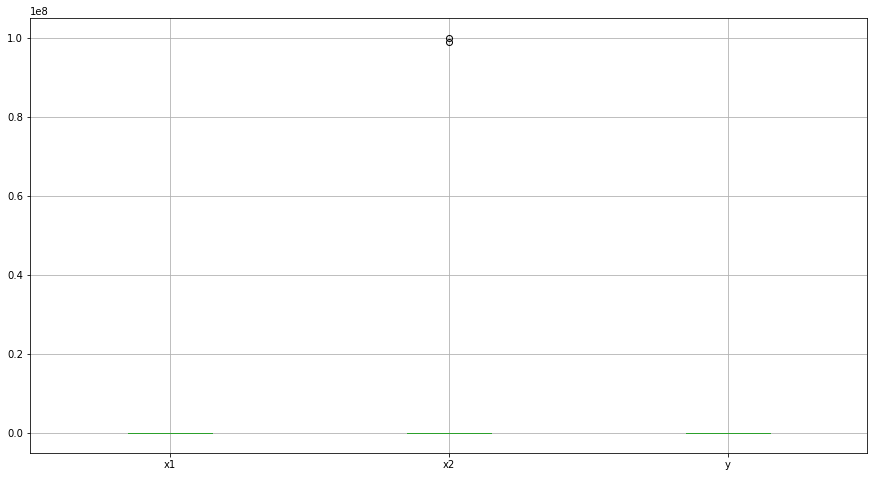

In [86]:
data.boxplot(figsize=(15,8))

In [87]:
print("Outliers in x1 :",data[((data.x1 - data.x1.mean()) / data.x1.std()).abs()>3]["x1"].count())
print("Outliers in x2 :",data[((data.x2 - data.x2.mean()) / data.x2.std()).abs()>3]["x2"].count())
print("Outliers in y :",data[((data.y - data.y.mean()) / data.y.std()).abs()>3]["y"].count())

Outliers in x1 : 0
Outliers in x2 : 2
Outliers in y : 0


# Removing outliers:

In [88]:
for cols in data.columns[:-1]:
    Q1=data[cols].quantile(0.25)
    Q3=data[cols].quantile(0.75)
    iqr=Q3-Q1
    
    low=Q1-1.5*iqr
    high=Q3+1.5*iqr
    data.loc[(data[cols]<low)| (data[cols]>high),cols]=data[cols].median()

<AxesSubplot:>

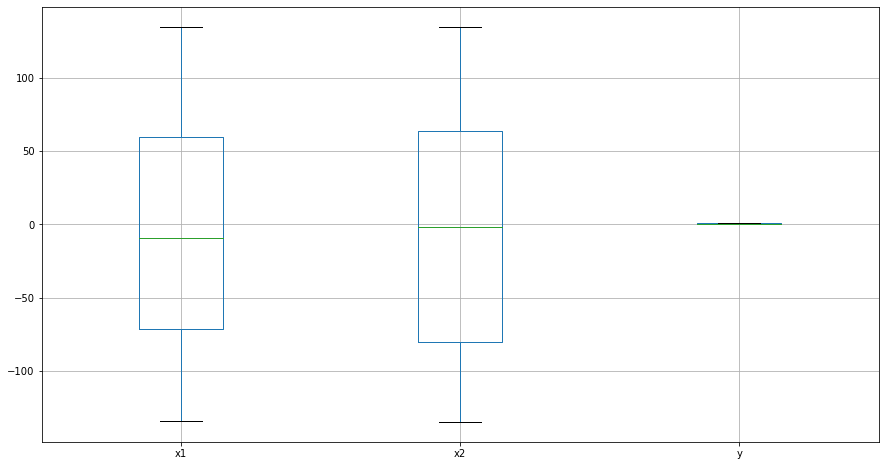

In [89]:
data.boxplot(figsize=(15,8))

# Splitting the dataset:

In [90]:
X=data.drop("y",axis=1)     #independent
y=data["y"]                 #dependent

In [91]:
print(X.head())
print(y.head())

           x1          x2
0 -119.366669  115.000000
1 -101.108044   97.777159
2 -130.278658  106.767654
3 -114.703415  101.195477
4 -119.366669  115.000000
0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64


In [92]:
from scipy.stats import zscore

Xscaled=X.apply(zscore)
Xscaled_data=pd.DataFrame(Xscaled,columns=data.columns)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=2)

In [94]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

# Logistic Regression: 

In [95]:
# Logistic Regression Classifier

classifier_1 = LogisticRegression(random_state=0, solver="liblinear")
classifier_1.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [96]:

#  Predict
y_pred_logi = classifier_1.predict(X_test)

# Generate predictions
predictions_logi_train =classifier_1.predict(X_train)
predictions_logi_test= classifier_1.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_1=classifier_1.score(X_train,y_train) 
print('Train_Score : ',train_Acc_1*100)

#ACCURACY = TEST DATA SCORE 
Acc_1=classifier_1.score(X_test, y_test)
print('Test_Score : ',Acc_1*100)




Train_Score :  74.11566535654127
Test_Score :  73.76681614349776


confusion_matrix is : 
[[247   2]
 [115  82]]
Accuracy score: 73.76681614349776
Precision score: 97.61904761904762
Recall score: 41.62436548223351
F1 score: 58.362989323843415
roc_auc_score_1 :  70.41057631541395
classification_report is : 
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       249
           1       0.98      0.42      0.58       197

    accuracy                           0.74       446
   macro avg       0.83      0.70      0.70       446
weighted avg       0.81      0.74      0.71       446

[0.         0.00704935 1.        ] [0.         0.42385787 1.        ] [2 1 0]
[0.         0.00803213 1.        ] [0.         0.41624365 1.        ] [2 1 0]
Train AUC: 0.708
Test AUC: 0.704


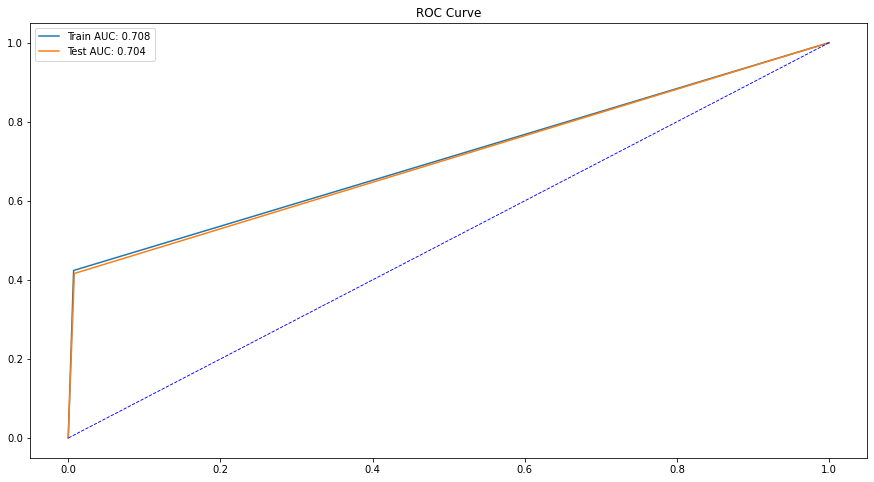

In [97]:
#  Confusion Matrix
print('confusion_matrix is : ')
cm_1= metrics.confusion_matrix(y_test, y_pred_logi) 
print(cm_1)

print('='*100)

accuracy_1 = metrics.accuracy_score(y_test, y_pred_logi) 
print("Accuracy score:",accuracy_1*100)

precision_1 = metrics.precision_score(y_test, y_pred_logi) 
print("Precision score:",precision_1*100)

recall_1 = metrics.recall_score(y_test, y_pred_logi) 
print("Recall score:",recall_1*100)

f1_1 = metrics.f1_score(y_test,y_pred_logi)
print("F1 score:",f1_1*100)

roc_auc_1 = roc_auc_score(y_test, predictions_logi_test)
print('roc_auc_score_1 : ', roc_auc_1*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_logi_test))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_logi_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_logi_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_logi = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_logi)

auc_test_logi = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_logi)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_logi)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_logi)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper parameter tunning:

In [120]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
logi = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', cv=5)
logi.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             scoring='roc_auc')

In [121]:
cv_results_svc=pd.DataFrame(logi.cv_results_)
cv_results_svc.head(

SyntaxError: unexpected EOF while parsing (<ipython-input-121-2817d1d17c06>, line 2)

In [123]:
#The accuracy of the model with the best parameters
logi_score=(logi.score(X_test, y_test)*100)
print("Accuracy is :" ,logi_score)

print('='*100)

logi_score1=logi.best_score_
print("best_score : ",logi_score1*100)
print("best_params : ",logi.best_params_)
print("best_estimator : ",logi.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_grid = logi.predict(X_test)
print(classification_report(y_test, y_grid))

print('='*100)

hyper_accuracy_1 = metrics.accuracy_score(y_test, y_grid) 
print("Accuracy score:",hyper_accuracy_1*100)

hyper_precision_1 = metrics.precision_score(y_test, y_grid) 
print("Precision score:",hyper_precision_1*100)

hyper_recall_1 = metrics.recall_score(y_test, y_grid) 
print("Recall score:",hyper_recall_1*100)

hyper_f1_1 = metrics.f1_score(y_test, y_grid)
print("F1 score:",hyper_f1_1*100)

# roc auc score for test data
hyper_roc_auc_1 = roc_auc_score(y_test, y_grid)
print('roc_auc_score_3 : ', hyper_roc_auc_1*100)

Accuracy is : 56.720282143803644
best_score :  57.5468004180846
best_params :  {'C': 0.0001}
best_estimator :  LogisticRegression(C=0.0001)
classification_report is : 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       249
           1       0.00      0.00      0.00       197

    accuracy                           0.56       446
   macro avg       0.28      0.50      0.36       446
weighted avg       0.31      0.56      0.40       446

Accuracy score: 55.82959641255605
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
roc_auc_score_3 :  50.0


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

# Decision Tree :

In [98]:
#  Fit the classifier

classifier_2 = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [99]:

# Making predictions on Test data
y_pred_dtr= classifier_2.predict(X_test)

# Generate predictions
predictions_dtr_train =classifier_2.predict(X_train)
predictions_dtr_test= classifier_2.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_2=classifier_2.score(X_train,y_train)          
print('Train_Score : ',train_Acc_2*100)

#ACCURACY = TEST DATA SCORE 
Acc_2=classifier_2.score(X_test, y_test)  
print('Test_Score : ',Acc_2*100)


Train_Score :  100.0
Test_Score :  92.82511210762333


confusion_matrix is : 
[[234  15]
 [ 17 180]]
Accuracy score: 92.82511210762333
Precision score: 92.3076923076923
Recall score: 91.37055837563452
F1 score: 91.83673469387756
roc_auc_score_2 :  92.67323099504618
classification_report is : 
              precision    recall  f1-score   support

          NO       0.93      0.94      0.94       249
         YES       0.92      0.91      0.92       197

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.06024096 1.        ] [0.         0.91370558 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.927


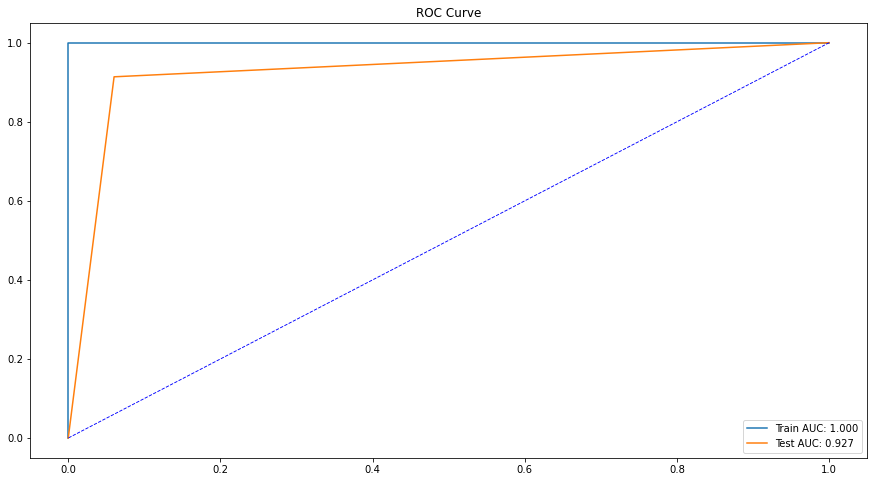

In [100]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_2 = metrics.confusion_matrix(y_test, y_pred_dtr) 
print(cm_2)

print('='*100)

accuracy_2 = metrics.accuracy_score(y_test, y_pred_dtr) 
print("Accuracy score:",accuracy_2*100)

precision_2 = metrics.precision_score(y_test, y_pred_dtr) 
print("Precision score:",precision_2*100)

recall_2 = metrics.recall_score(y_test, y_pred_dtr) 
print("Recall score:",recall_2*100)

f1_2 = metrics.f1_score(y_test,y_pred_dtr) 
print("F1 score:",f1_2*100)

roc_auc_2 = roc_auc_score(y_test, predictions_dtr_test)
print('roc_auc_score_2 : ', roc_auc_2*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_dtr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_dtr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_dtr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_dtr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_dtr)

auc_test_dtr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_dtr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_dtr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_dtr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper parameter tunning:

In [124]:

dtr = DecisionTreeClassifier()
tuned_parameters=[{'max_depth':[2,3,5,10],'min_samples_leaf':[5,10,20,50]}]
DTR=GridSearchCV( DecisionTreeClassifier(),tuned_parameters,scoring='roc_auc',cv=5,n_jobs=-1)
DTR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 5, 10],
                          'min_samples_leaf': [5, 10, 20, 50]}],
             scoring='roc_auc')

In [125]:
cv_results_dtr=pd.DataFrame(DTR.cv_results_)
cv_results_dtr.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077958,0.040052,0.005995,0.000892,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.833312,0.917518,0.917902,0.850259,0.841932,0.872184,0.037556,13
1,0.003798,0.000400,0.004197,0.000748,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.833312,0.917518,0.917902,0.850259,0.841932,0.872184,0.037556,13
2,0.004397,0.000489,0.004597,0.000490,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.833312,0.917518,0.917902,0.850259,0.841932,0.872184,0.037556,13
3,0.004397,0.000489,0.004598,0.000490,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.833312,0.917518,0.917902,0.850259,0.841932,0.872184,0.037556,13
4,0.004997,0.000001,0.004397,0.000489,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.950051,0.977979,0.976187,0.953043,0.898638,0.951180,0.028667,9


In [126]:
#The accuracy of the model with the best parameters
dtr_score=DTR.score(X_test, y_test)
print("Best_Score is :" ,DTR.score(X_test, y_test)*100)

print('='*100)

dtr_score1=DTR.best_score_
print("best_score : ",dtr_score1*100)
print("best_params : ",DTR.best_params_)
print("best_estimator : ",DTR.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = DTR.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_2 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_2*100)

hyper_precision_2 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_2*100)

hyper_recall_2 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_2*100)

hyper_f1_2 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_2*100)

# roc auc score for test data
hyper_roc_auc_2 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_2*100)

Best_Score is : 98.89303406519478
best_score :  98.8975244199746
best_params :  {'max_depth': 10, 'min_samples_leaf': 20}
best_estimator :  DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)
classification_report is : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       249
           1       0.93      0.94      0.93       197

    accuracy                           0.94       446
   macro avg       0.94      0.94      0.94       446
weighted avg       0.94      0.94      0.94       446

Accuracy score: 94.17040358744396
Precision score: 92.96482412060301
Recall score: 93.90862944162437
F1 score: 93.43434343434343
roc_auc_score_3 :  94.1430697408925


# KNN :

In [101]:
# fitting the model

classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_3.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [102]:

#  Predict
y_pred_knn = classifier_3.predict(X_test)

# Generate predictions
predictions_knn_train =classifier_3.predict(X_train)
predictions_knn_test= classifier_3.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_3=classifier_3.score(X_train,y_train)          
print('Train_Score : ',train_Acc_4*100)

#ACCURACY = TEST DATA SCORE 
Acc_3=classifier_3.score(X_test, y_test) 
print('Test_Score : ',Acc_4*100)


Train_Score :  96.68725435148792
Test_Score :  94.39461883408072


confusion_matrix is : 
[[239  10]
 [ 15 182]]
Accuracy score: 94.39461883408072
Precision score: 94.79166666666666
Recall score: 92.38578680203045
F1 score: 93.57326478149099
roc_auc_score :  94.18486127250117
classification_report is : 
              precision    recall  f1-score   support

          NO       0.94      0.96      0.95       249
         YES       0.95      0.92      0.94       197

    accuracy                           0.94       446
   macro avg       0.94      0.94      0.94       446
weighted avg       0.94      0.94      0.94       446

[0.         0.03121853 1.        ] [0.         0.96446701 1.        ] [2 1 0]
[0.         0.04016064 1.        ] [0.         0.92385787 1.        ] [2 1 0]
Train AUC: 0.967
Test AUC: 0.942


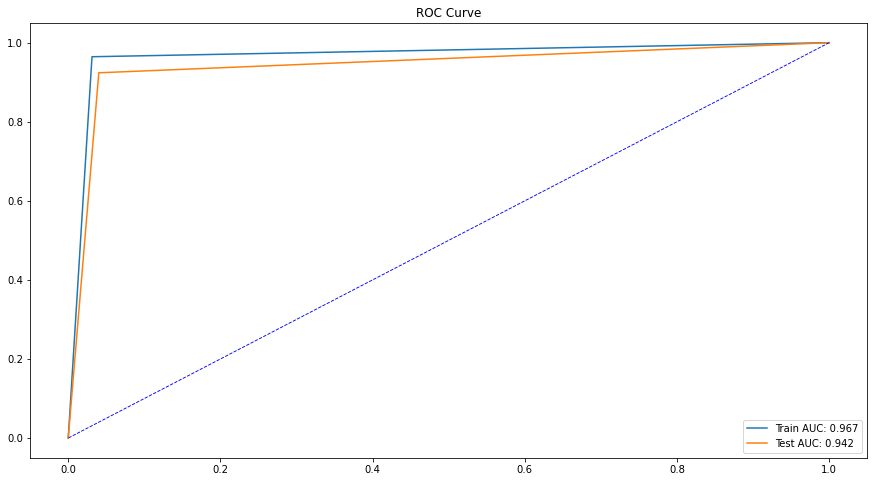

In [103]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_3 = metrics.confusion_matrix(y_test, y_pred_knn) 
print(cm_3)

print('='*100)

accuracy_3 = metrics.accuracy_score(y_test,y_pred_knn) 
print("Accuracy score:",accuracy_3*100)

precision_3 = metrics.precision_score(y_test,y_pred_knn) 
print("Precision score:",precision_3*100)

recall_3 = metrics.recall_score(y_test,y_pred_knn) 
print("Recall score:",recall_3*100)

f1_3 = metrics.f1_score(y_test,y_pred_knn) 
print("F1 score:",f1_3*100)

roc_auc_3 = roc_auc_score(y_test, predictions_knn_test)
print('roc_auc_score : ', roc_auc_3*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_knn_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_knn_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_knn_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_knn = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_knn)

auc_test_knn = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_knn)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_knn)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_knn)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper parameter tunning:

In [127]:
knn = KNeighborsClassifier(n_neighbors=3)
tuned_parameters=[{'n_neighbors':[3,20,2],'metric':['canberra','euclidean','minkowski']}]
KNN=GridSearchCV(KNeighborsClassifier(n_neighbors=3),tuned_parameters,scoring='roc_auc',cv=5,n_jobs=-1)
KNN.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': [3, 20, 2]}],
             scoring='roc_auc')

In [128]:
cv_results_knn=pd.DataFrame(KNN.cv_results_)
cv_results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.053166,0.023896,0.037779,0.010161,canberra,3,"{'metric': 'canberra', 'n_neighbors': 3}",0.973570,0.984445,0.970777,0.971471,0.974524,0.974957,0.004934,6
1,0.005197,0.000979,0.049172,0.021336,canberra,20,"{'metric': 'canberra', 'n_neighbors': 20}",0.989425,0.991118,0.990526,0.991673,0.994246,0.991398,0.001607,3
2,0.004397,0.000490,0.028185,0.013725,canberra,2,"{'metric': 'canberra', 'n_neighbors': 2}",0.968704,0.979451,0.956662,0.967012,0.961322,0.966630,0.007699,7
3,0.006995,0.001094,0.021189,0.016692,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.979772,0.983116,0.973226,0.976330,0.977720,0.978033,0.003316,4
4,0.029382,0.021937,0.038975,0.014090,euclidean,20,"{'metric': 'euclidean', 'n_neighbors': 20}",0.990109,0.991374,0.992142,0.991178,0.994454,0.991851,0.001454,1


In [135]:
#The accuracy of the model with the best parameters
knn_score=KNN.score(X_test, y_test)
print("Best_Score is :" ,knn_score*100)

print('='*100)

knn_score1=KNN.best_score_
print("best_score : ",knn_score1*100)
print("best_params : ",KNN.best_params_)
print("best_estimator : ",KNN.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_3 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_3*100)

hyper_precision_3 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_3*100)

hyper_recall_3 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_3*100)

hyper_f1_3 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_3*100)

# roc auc score for test data
hyper_roc_auc_3 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_3*100)


Best_Score is : 99.34050924510224
best_score :  99.18513424286161
best_params :  {'metric': 'euclidean', 'n_neighbors': 20}
best_estimator :  KNeighborsClassifier(metric='euclidean', n_neighbors=20)
classification_report is : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       249
           1       0.96      0.92      0.94       197

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446

Accuracy score: 94.84304932735425
Precision score: 95.78947368421052
Recall score: 92.38578680203045
F1 score: 94.05684754521964
roc_auc_score_3 :  94.58646769820398


# SVM :


In [104]:
# fitting the model

classifier_4 = svm.SVC()
classifier_4.fit(X_train, y_train)

SVC()

In [105]:
#  Predict
y_pred_svc = classifier_4.predict(X_test)

# Generate predictions
predictions_svc_train =classifier_4.predict(X_train)
predictions_svc_test= classifier_4.predict(X_test)
                                           
#ACCURACY = TRAIN DATA SCORE 
train_Acc_4=classifier_4.score(X_train,y_train)          
print('Train_Score : ',train_Acc_4*100)

#ACCURACY = TEST DATA SCORE 
Acc_4=classifier_4.score(X_test, y_test) 
print('Test_Score : ',Acc_4*100)

Train_Score :  94.8343627175744
Test_Score :  93.94618834080718


confusion_matrix is : 
[[245   4]
 [ 23 174]]
Accuracy score: 93.94618834080718
Precision score: 97.75280898876404
Recall score: 88.3248730964467
F1 score: 92.8
roc_auc_score_4 :  93.35922369681772
classification_report is : 
              precision    recall  f1-score   support

          NO       0.91      0.98      0.95       249
         YES       0.98      0.88      0.93       197

    accuracy                           0.94       446
   macro avg       0.95      0.93      0.94       446
weighted avg       0.94      0.94      0.94       446

[0.         0.02618328 1.        ] [0.         0.91624365 1.        ] [2 1 0]
[0.         0.01606426 1.        ] [0.         0.88324873 1.        ] [2 1 0]
Train AUC: 0.945
Test AUC: 0.934


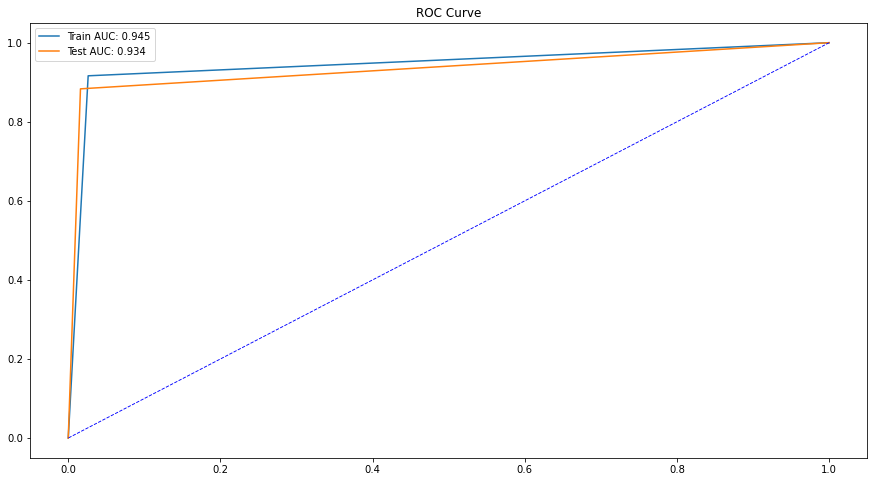

In [106]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_4 = metrics.confusion_matrix(y_test, y_pred_svc) 
print(cm_4)

print('='*100)

accuracy_4 = metrics.accuracy_score(y_test,y_pred_svc) 
print("Accuracy score:",accuracy_4*100)

precision_4 = metrics.precision_score(y_test,y_pred_svc) 
print("Precision score:",precision_4*100)

recall_4 = metrics.recall_score(y_test,y_pred_svc) 
print("Recall score:",recall_4*100)

f1_4 = metrics.f1_score(y_test,y_pred_svc) 
print("F1 score:",f1_4*100)

roc_auc_4 = roc_auc_score(y_test, predictions_svc_test)
print('roc_auc_score_4 : ', roc_auc_4*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_svc_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_svc_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_svc_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_svc = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_svc)

auc_test_svc = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_svc)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_svc)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_svc)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();


## Hyper parameter tunning:


In [130]:

svc = svm.SVC()
tuned_parameters=[{'gamma':[1e-2,1e-3,1e-4],'C':[1,10,100,1000]}]
svc=GridSearchCV(svm.SVC(),tuned_parameters,scoring='roc_auc',cv=5)
svc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             scoring='roc_auc')

In [131]:
cv_results_svc=pd.DataFrame(svc.cv_results_)
cv_results_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.446945,0.107260,0.255453,0.091131,1,0.01,"{'C': 1, 'gamma': 0.01}",0.877680,0.822872,0.661972,0.777618,0.764225,0.780873,0.071499,5
1,0.437349,0.110073,0.167703,0.036844,1,0.001,"{'C': 1, 'gamma': 0.001}",0.655874,0.594021,0.507058,0.552551,0.547724,0.571446,0.050405,9
2,0.328011,0.033509,0.152124,0.024086,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.653076,0.592837,0.504913,0.549035,0.545966,0.569165,0.050345,12
3,0.175484,0.019052,0.097544,0.026730,10,0.01,"{'C': 10, 'gamma': 0.01}",0.989473,0.992638,0.989982,0.988940,0.993511,0.990909,0.001820,3
4,0.298630,0.029984,0.134122,0.007570,10,0.001,"{'C': 10, 'gamma': 0.001}",0.660359,0.596102,0.514675,0.557921,0.551912,0.576194,0.049372,7


In [136]:
#The accuracy of the model with the best parameters
svc_score=svc.score(X_test, y_test)
print("Best_Score is :" ,svc_score*100)

print('='*100)

svc_score1=svc.best_score_
print("best_score : ",svc_score1*100)
print("best_params : ",svc.best_params_)
print("best_estimator : ",svc.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_4 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_4*100)

hyper_precision_4 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_4*100)

hyper_recall_4 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_4*100)

hyper_f1_4 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_4*100)

# roc auc score for test data
hyper_roc_auc_4 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_4 : ', hyper_roc_auc_4*100)

Best_Score is : 99.40064827839275
best_score :  99.16053397469791
best_params :  {'C': 1000, 'gamma': 0.01}
best_estimator :  SVC(C=1000, gamma=0.01)
classification_report is : 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       249
           1       0.99      0.86      0.92       197

    accuracy                           0.93       446
   macro avg       0.94      0.92      0.93       446
weighted avg       0.94      0.93      0.93       446

Accuracy score: 93.27354260089686
Precision score: 98.83040935672514
Recall score: 85.78680203045685
F1 score: 91.84782608695652
roc_auc_score_4 :  92.49179458952563


# SVC_RBF :

In [112]:
# fitting the model

classifier_5 = svm.SVC(kernel='rbf')
classifier_5.fit(X_train, y_train)

SVC()

In [113]:
#  Predict
y_pred_svc = classifier_5.predict(X_test)

# Generate predictions
predictions_svc_train =classifier_5.predict(X_train)
predictions_svc_test= classifier_5.predict(X_test)
                                           
#ACCURACY = TRAIN DATA SCORE 
train_Acc_5=classifier_5.score(X_train,y_train)          
print('Train_Score : ',train_Acc_5*100)

#ACCURACY = TEST DATA SCORE 
Acc_5=classifier_5.score(X_test, y_test) 
print('Test_Score : ',Acc_5*100)

Train_Score :  94.8343627175744
Test_Score :  93.94618834080718


confusion_matrix is : 
[[245   4]
 [ 23 174]]
Accuracy score: 93.94618834080718
Precision score: 97.75280898876404
Recall score: 88.3248730964467
F1 score: 92.8
roc_auc_score_5 :  93.35922369681772
classification_report is : 
              precision    recall  f1-score   support

          NO       0.91      0.98      0.95       249
         YES       0.98      0.88      0.93       197

    accuracy                           0.94       446
   macro avg       0.95      0.93      0.94       446
weighted avg       0.94      0.94      0.94       446

[0.         0.02618328 1.        ] [0.         0.91624365 1.        ] [2 1 0]
[0.         0.01606426 1.        ] [0.         0.88324873 1.        ] [2 1 0]
Train AUC: 0.945
Test AUC: 0.934


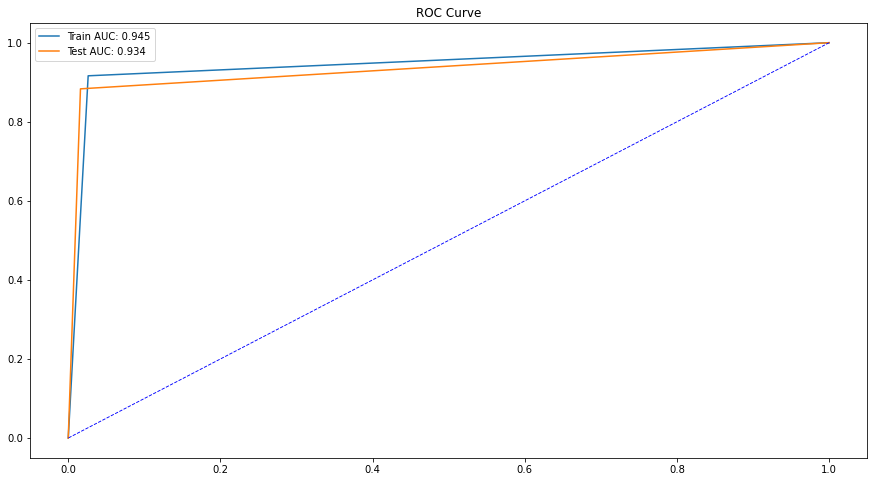

In [114]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_5 = metrics.confusion_matrix(y_test, y_pred_svc) 
print(cm_5)

print('='*100)

accuracy_5 = metrics.accuracy_score(y_test,y_pred_svc) 
print("Accuracy score:",accuracy_5*100)

precision_5 = metrics.precision_score(y_test,y_pred_svc) 
print("Precision score:",precision_5*100)

recall_5 = metrics.recall_score(y_test,y_pred_svc) 
print("Recall score:",recall_5*100)

f1_5 = metrics.f1_score(y_test,y_pred_svc) 
print("F1 score:",f1_5*100)

roc_auc_5 = roc_auc_score(y_test, predictions_svc_test)
print('roc_auc_score_5 : ', roc_auc_5*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_svc_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_svc_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_svc_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_svc = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_svc)

auc_test_svc = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_svc)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_svc)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_svc)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();


## Hyper parameter tunning:

In [133]:

svc = svm.SVC(kernel='rbf')
tuned_parameters=[{'gamma':[1e-2,1e-3,1e-4],'C':[1,10,100,1000]}]
svc=GridSearchCV(svm.SVC(),tuned_parameters,scoring='roc_auc',cv=5)
svc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             scoring='roc_auc')

In [134]:
cv_results_svc=pd.DataFrame(svc.cv_results_)
cv_results_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.278641,0.023451,0.149514,0.020349,1,0.01,"{'C': 1, 'gamma': 0.01}",0.877680,0.822872,0.661972,0.777618,0.764225,0.780873,0.071499,5
1,0.315818,0.048990,0.154774,0.022692,1,0.001,"{'C': 1, 'gamma': 0.001}",0.655874,0.594021,0.507058,0.552551,0.547724,0.571446,0.050405,9
2,0.327008,0.057546,0.151918,0.022674,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.653076,0.592837,0.504913,0.549035,0.545966,0.569165,0.050345,12
3,0.197083,0.033355,0.097749,0.015420,10,0.01,"{'C': 10, 'gamma': 0.01}",0.989473,0.992638,0.989982,0.988940,0.993511,0.990909,0.001820,3
4,0.288229,0.025379,0.129532,0.018038,10,0.001,"{'C': 10, 'gamma': 0.001}",0.660359,0.596102,0.514675,0.557921,0.551912,0.576194,0.049372,7


In [137]:
#The accuracy of the model with the best parameters
svcrbf_score=svc.score(X_test, y_test)
print("Best_Score is :" ,svcrbf_score*100)

print('='*100)

svcrbf_score1=svc.best_score_
print("best_score : ",svcrbf_score1*100)
print("best_params : ",svc.best_params_)
print("best_estimator : ",svc.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_5 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_5*100)

hyper_precision_5 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_5*100)

hyper_recall_5 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_5*100)

hyper_f1_5 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_5*100)

# roc auc score for test data
hyper_roc_auc_5 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_5 : ', hyper_roc_auc_5*100)

Best_Score is : 99.40064827839275
best_score :  99.16053397469791
best_params :  {'C': 1000, 'gamma': 0.01}
best_estimator :  SVC(C=1000, gamma=0.01)
classification_report is : 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       249
           1       0.99      0.86      0.92       197

    accuracy                           0.93       446
   macro avg       0.94      0.92      0.93       446
weighted avg       0.94      0.93      0.93       446

Accuracy score: 93.27354260089686
Precision score: 98.83040935672514
Recall score: 85.78680203045685
F1 score: 91.84782608695652
roc_auc_score_5 :  92.49179458952563


## Comparision of all models:

In [138]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','KNN','SVC','SVC_rbf'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4,train_Acc_5],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4,Acc_5]
})
models.sort_values(by=['Train_Score','Test_Score'], ascending=False)

,Model,Train_Score,Test_Score
1,Decision Tree,1.000000,0.928251
2,KNN,0.966873,0.943946
3,SVC,0.948344,0.939462
4,SVC_rbf,0.948344,0.939462
0,Logistic Regression,0.741157,0.737668


In [139]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','KNN','SVC','SVC_rbf'],
    'Precision': [precision_1, precision_2,precision_3, precision_4,precision_5],
    'Recall': [recall_1, recall_2,recall_3, recall_4,recall_5],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5]
})
models.sort_values(by=['Precision','Recall','F1_Score','Roc_Score'], ascending=False)

,Model,Precision,Recall,F1_Score,Roc_Score
3,SVC,0.977528,0.883249,0.928000,0.933592
4,SVC_rbf,0.977528,0.883249,0.928000,0.933592
0,Logistic Regression,0.976190,0.416244,0.583630,0.704106
2,KNN,0.947917,0.923858,0.935733,0.941849
1,Decision Tree,0.923077,0.913706,0.918367,0.926732


In [140]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','KNN','SVC','SVC_rbf'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4,train_Acc_5],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4,Acc_5],
    'Precision': [precision_1, precision_2,precision_3, precision_4,precision_5],
    'Recall': [recall_1, recall_2,recall_3, recall_4,recall_5],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5]
})
models.sort_values(by=['Train_Score','Test_Score','Precision','Recall','F1_Score','Roc_Score'], ascending=False)

,Model,Train_Score,Test_Score,Precision,Recall,F1_Score,Roc_Score
1,Decision Tree,1.000000,0.928251,0.923077,0.913706,0.918367,0.926732
2,KNN,0.966873,0.943946,0.947917,0.923858,0.935733,0.941849
3,SVC,0.948344,0.939462,0.977528,0.883249,0.928000,0.933592
4,SVC_rbf,0.948344,0.939462,0.977528,0.883249,0.928000,0.933592
0,Logistic Regression,0.741157,0.737668,0.976190,0.416244,0.583630,0.704106


## Hyper parameter tunning scores:

In [141]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','KNN','SVC','SVC_rbf'],
    'Accuarcy' : [accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5],
    'Precision': [hyper_precision_1, hyper_precision_2,hyper_precision_3,hyper_precision_4, hyper_precision_5],
    'Recall': [hyper_recall_1, hyper_recall_2,hyper_recall_3, hyper_recall_4, hyper_recall_5],
    'F1_Score': [hyper_f1_1,hyper_f1_2,hyper_f1_3,hyper_f1_4,hyper_f1_5],
    'Roc_Score':[hyper_roc_auc_1,hyper_roc_auc_2,hyper_roc_auc_3,hyper_roc_auc_4,hyper_roc_auc_5],
    'Tuned_Score' : [logi_score1,dtr_score1,knn_score1,svc_score1,svcrbf_score1]
})
models.sort_values(by=['Accuarcy','Precision','Recall','F1_Score','Roc_Score','Tuned_Score'], ascending=False)

,Model,Accuarcy,Precision,Recall,F1_Score,Roc_Score,Tuned_Score
2,KNN,0.943946,0.957895,0.923858,0.940568,0.945865,0.991851
3,SVC,0.939462,0.988304,0.857868,0.918478,0.924918,0.991605
4,SVC_rbf,0.939462,0.988304,0.857868,0.918478,0.924918,0.991605
1,Decision Tree,0.928251,0.929648,0.939086,0.934343,0.941431,0.988975
0,Logistic Regression,0.737668,0.000000,0.000000,0.000000,0.500000,0.575468


# Observation And Conclusion:

* As per Metric scores and hyper tuned score the KNN and SVC models are perfoning well on this given dataset.